In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Data Loading

In [3]:
#Load the dataset
data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
    
)

data_path = r'E:\4-2\Eurosat Dataset\2750'

data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'] 

)

Found 27000 images belonging to 10 classes.


In [4]:
#Training & Testing Dataset 

In [5]:
train_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

    

)

Found 21600 images belonging to 10 classes.


In [6]:
test_data = data_generator.flow_from_directory(
    r'E:\4-2\Eurosat Dataset\2750',
    target_size=(64, 64),
    batch_size=1,
    subset='validation',
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

    
)

Found 5400 images belonging to 10 classes.


In [7]:
#ANN

In [8]:
#Model building using ANN
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(64,64,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])




In [9]:
ann.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
ann.fit(train_data,validation_data=test_data, epochs=10)

Epoch 1/10


2700/2700 [==============================] - 489s 180ms/step - loss: 1.7430 - accuracy: 0.3373 - val_loss: 1.6070 - val_accuracy: 0.3478
Epoch 2/10
2700/2700 [==============================] - 788s 292ms/step - loss: 1.5253 - accuracy: 0.4329 - val_loss: 1.3958 - val_accuracy: 0.5020
Epoch 3/10
2700/2700 [==============================] - 646s 239ms/step - loss: 1.4351 - accuracy: 0.4751 - val_loss: 1.4830 - val_accuracy: 0.4607
Epoch 4/10
2700/2700 [==============================] - 501s 186ms/step - loss: 1.3754 - accuracy: 0.4965 - val_loss: 1.2863 - val_accuracy: 0.5361
Epoch 5/10
2700/2700 [==============================] - 534s 198ms/step - loss: 1.3329 - accuracy: 0.5178 - val_loss: 1.3907 - val_accuracy: 0.4980
Epoch 6/10
2700/2700 [==============================] - 514s 190ms/step - loss: 1.2966 - accuracy: 0.5330 - val_loss: 1.2359 - val_accuracy: 0.5600
Epoch 7/10
2700/2700 [==============================] - 598s 222ms/step - loss: 1.2648 - accuracy: 0.5435 - va

In [11]:
ann.evaluate(test_data)

5400/5400 [==============================] - 59s 11ms/step - loss: 1.1824 - accuracy: 0.5652


[1.1823952198028564, 0.5651851892471313]

In [12]:
#Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

y_true = []
for i in range(test_data.samples // test_data.batch_size):
    _, batch_labels = test_data.next()
    y_true.extend(np.argmax(batch_labels, axis=-1))
    
# Generating predictions for test data
y_probab = ann.predict(test_data, steps=np.ceil(test_data.samples/test_data.batch_size))

#Generating predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

#Generating confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Classification Report: \n", classification_report(y_true, y_pred))

5400/5400 [==============================] - 58s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.46      0.56       600
           1       0.70      0.92      0.79       600
           2       0.52      0.20      0.28       600
           3       0.38      0.35      0.36       500
           4       0.81      0.69      0.74       500
           5       0.75      0.46      0.57       400
           6       0.47      0.48      0.47       500
           7       0.37      0.94      0.53       600
           8       0.63      0.45      0.52       500
           9       0.81      0.67      0.74       600

    accuracy                           0.57      5400
   macro avg       0.62      0.56      0.56      5400
weighted avg       0.62      0.57      0.56      5400



In [14]:
#Plotting Confusion Matrix

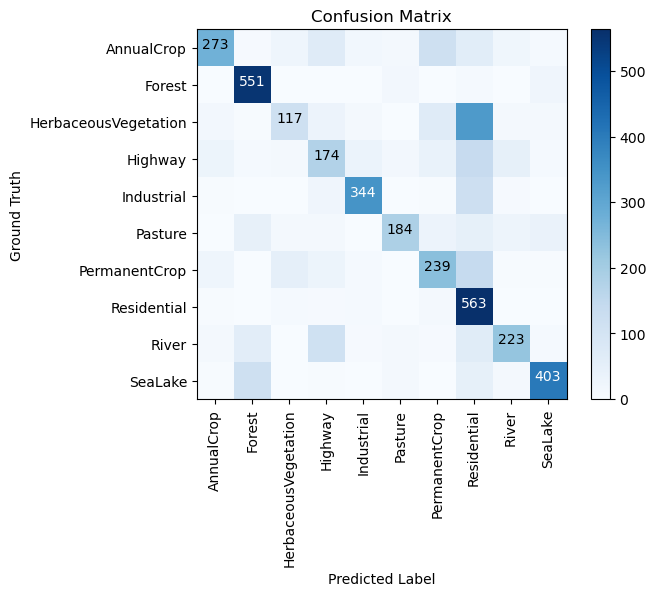

In [15]:
#plotting confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.class_indices))
plt.xticks(tick_marks, data.class_indices, rotation=90)
plt.yticks(tick_marks, data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth')

# adding values in each cell
thresh = cm.max() / 2.
for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()